# Análisis de precios de autos

El siguiente análisis modela la relación entre diversas características de una serie de automóviles con sus respectivos precios. El dataset utilizado se encuentra disponible en https://www.kaggle.com/hellbuoy/car-price-prediction.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de dataset

In [2]:
df = pd.read_csv(r"./CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

### Preprocesado de datos

In [4]:
df1 = df

remove = ["car_ID", "CarName"]

df1 = df1.drop(remove, axis = 1)

In [5]:
categoricas = ["symboling", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel",
               "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

for var in categoricas:
    dummy = pd.get_dummies(df1[var], prefix=var)
    df1 = pd.concat([df1, dummy], axis = 1)
    
df1 = df1.drop(categoricas, axis = 1)

In [6]:
df1.columns.values

array(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1

In [7]:
df1.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df1.shape

(205, 58)

In [9]:
df = df1

El dataset presenta 205 muestras y 58 columnas

### Declaración de variables predictoras y target

In [10]:
target = ["price"]
predictoras = [x for x in df.columns.values if x not in target]

x = df[predictoras]
y = df[target]

### Visualización en gráfico de dispersión

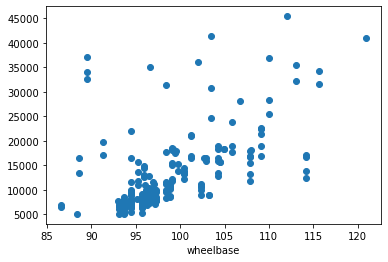

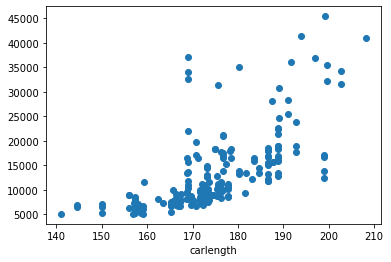

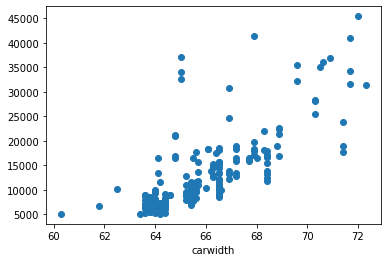

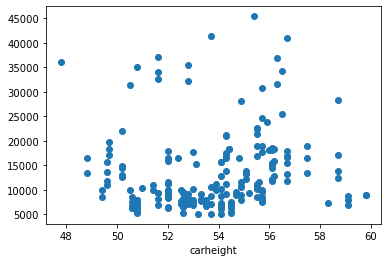

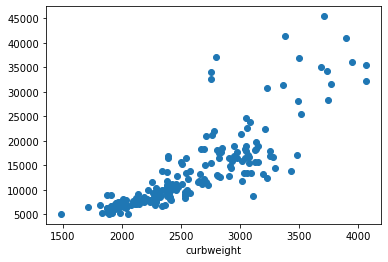

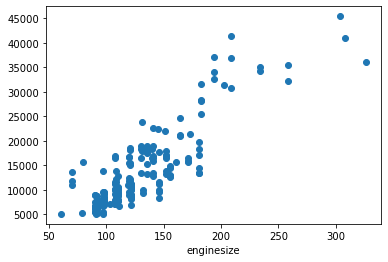

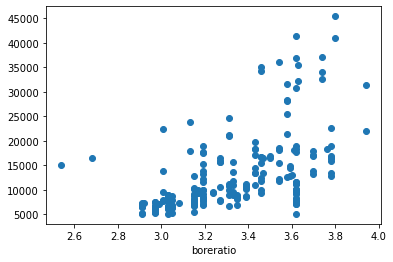

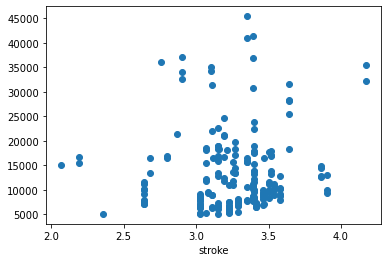

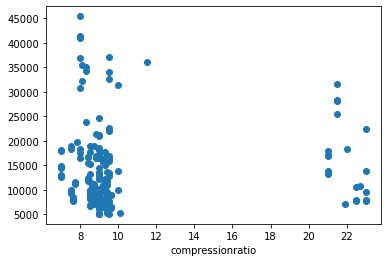

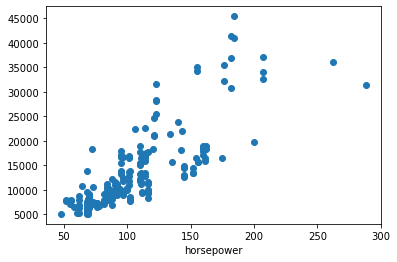

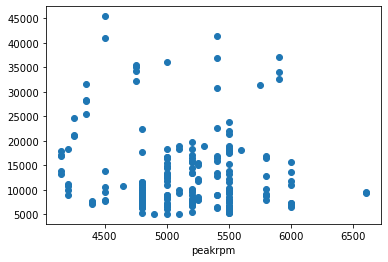

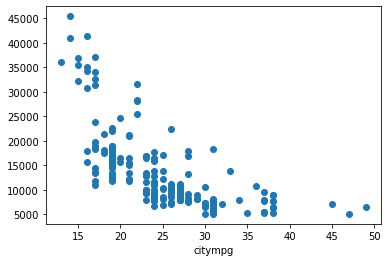

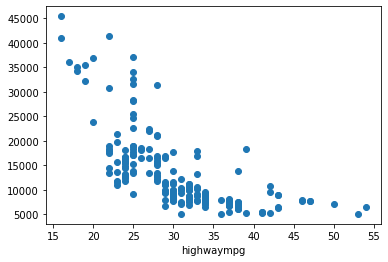

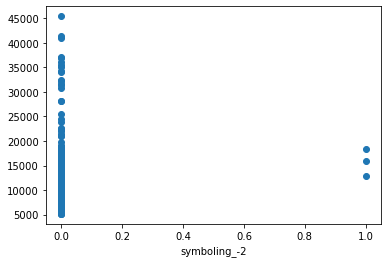

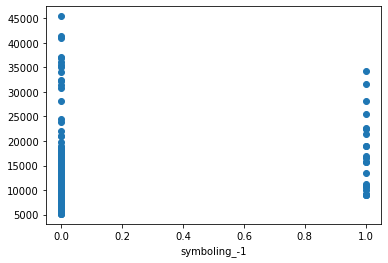

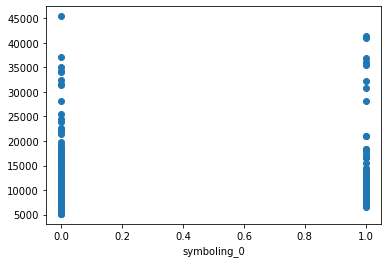

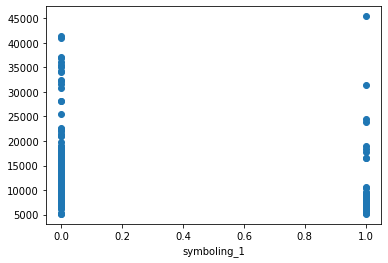

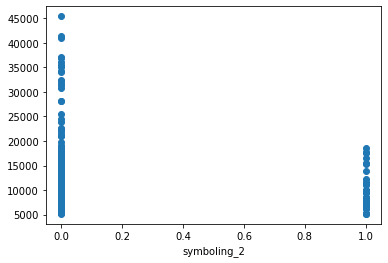

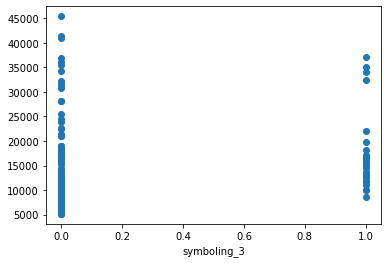

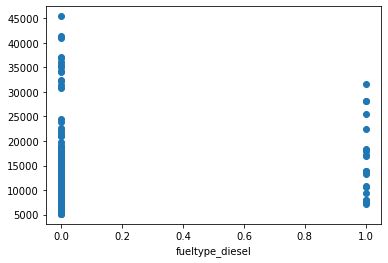

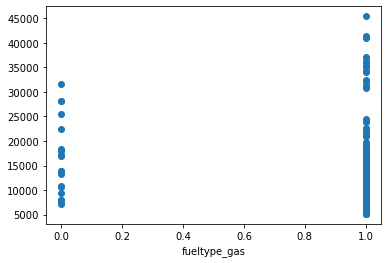

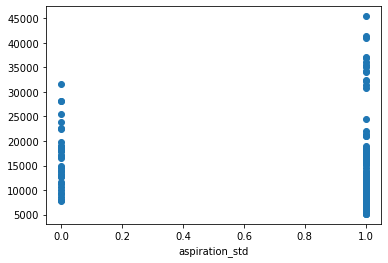

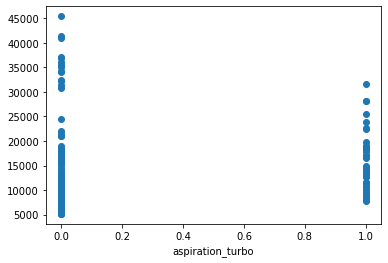

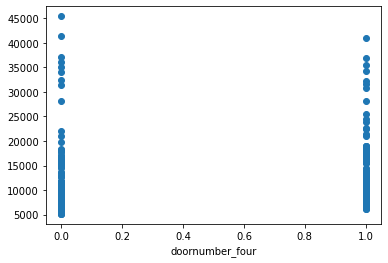

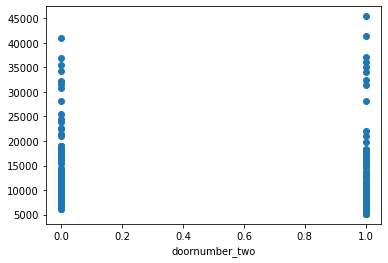

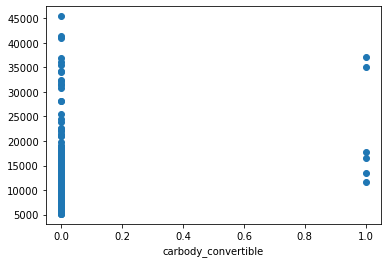

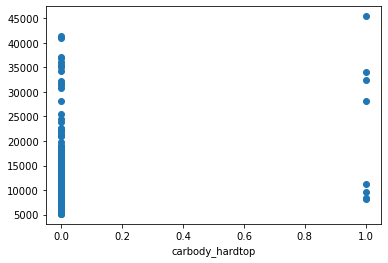

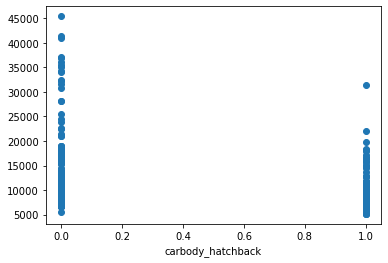

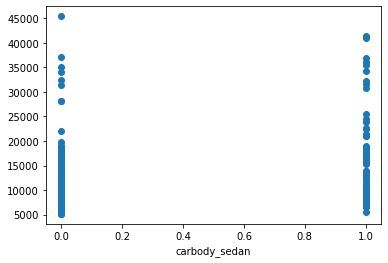

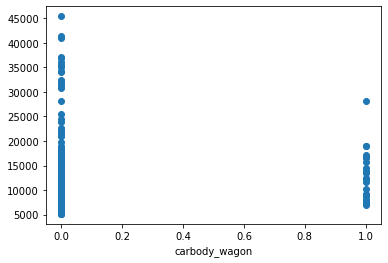

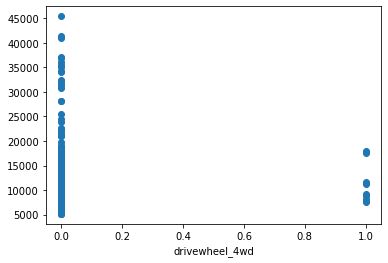

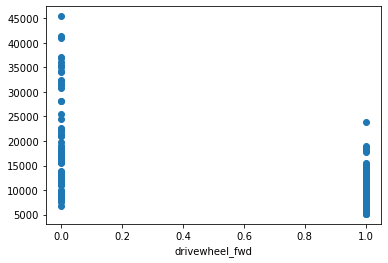

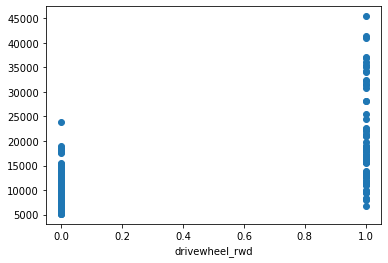

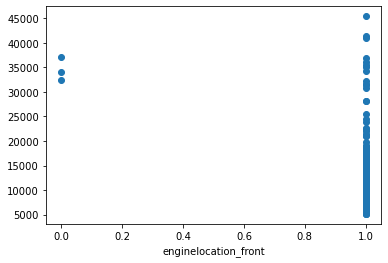

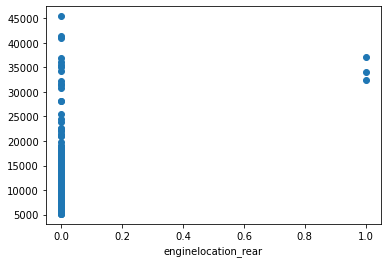

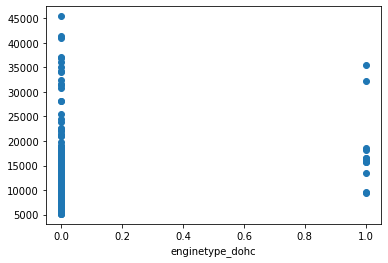

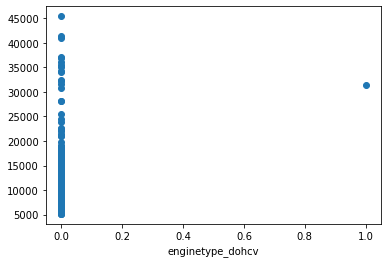

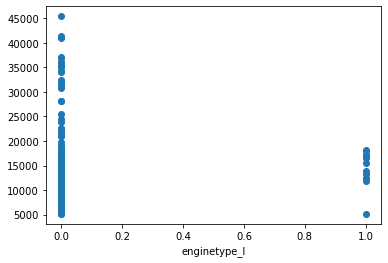

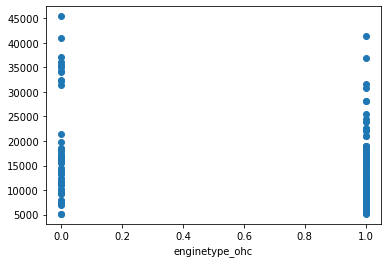

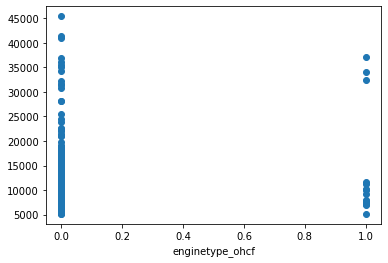

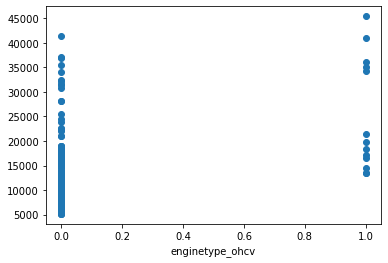

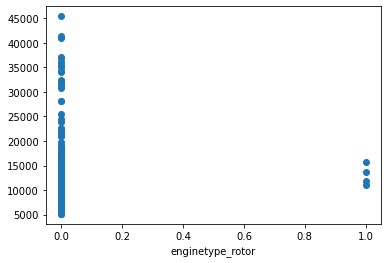

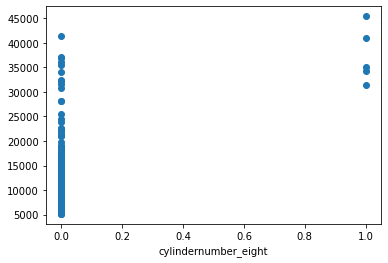

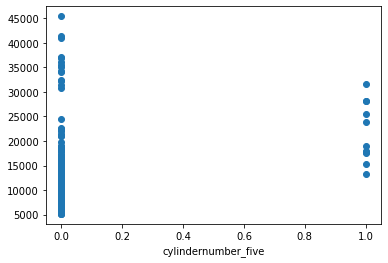

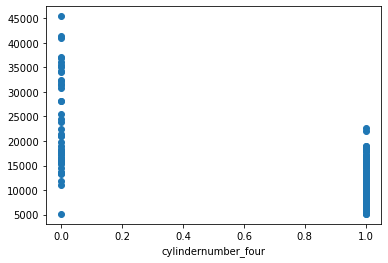

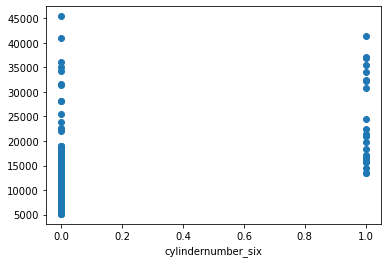

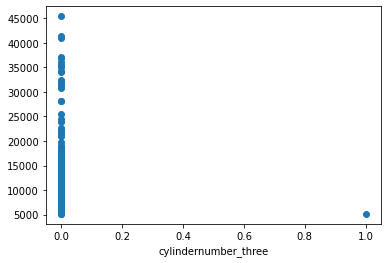

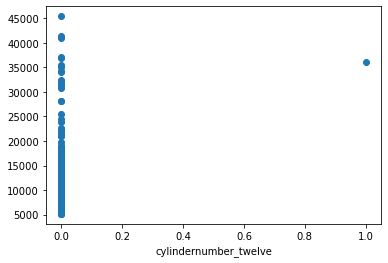

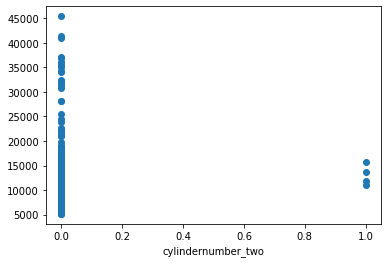

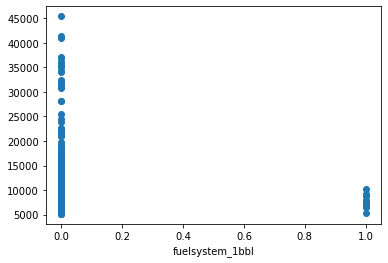

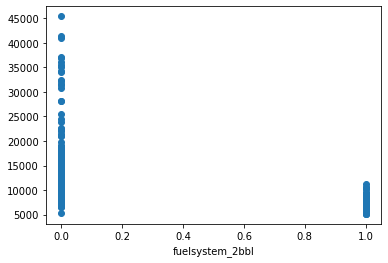

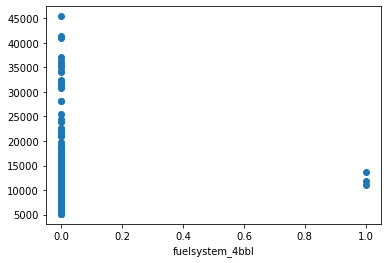

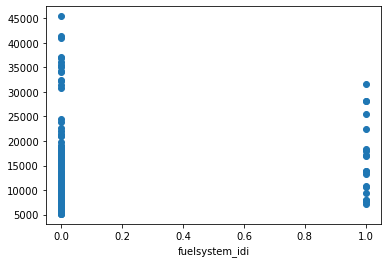

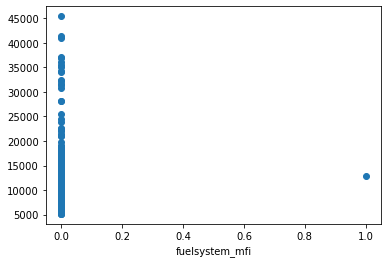

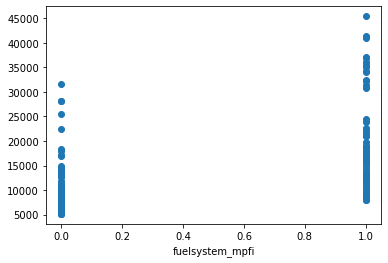

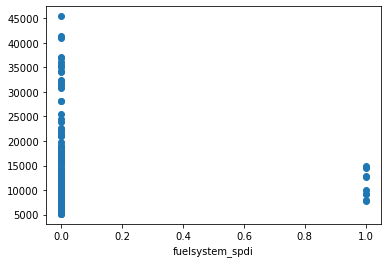

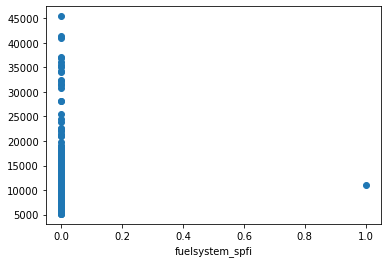

In [11]:
for var in x.columns.values:
    plt.scatter(x[var], y)
    plt.xlabel(var)
    plt.show()

### Modelado

In [12]:
# Algunas de las variables se relacionan mediante una función logarítmica, 
# por lo que es empleable este método para la realización del modelo. Se procede a ajustar los valores

logy = np.log(y)

rl = linear_model.LinearRegression()
rl.fit(x, logy)

n = 25

selector = RFE(rl, n_features_to_select=n, step=10)
selector = selector.fit(x, logy)

### Evaluación

In [13]:
y_pred = rl.predict(x)

mean_squared_error(logy, y_pred), r2_score(logy, y_pred), np.sqrt(mean_squared_error(logy, y_pred))

(0.014380995006995412, 0.9430639519268058, 0.11992078638416032)

El MSE es 0.014 y el estadístico R2 es 0.943

### Visualización de resultados

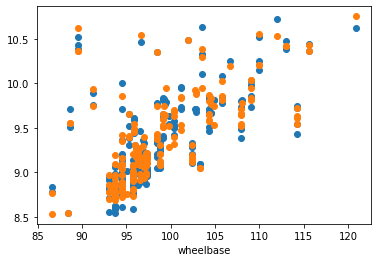

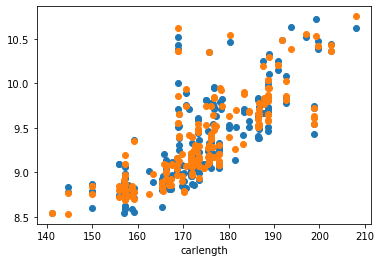

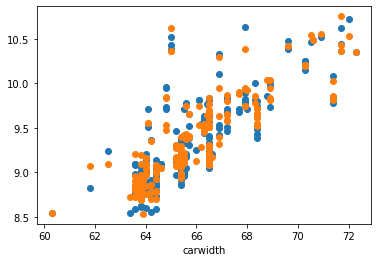

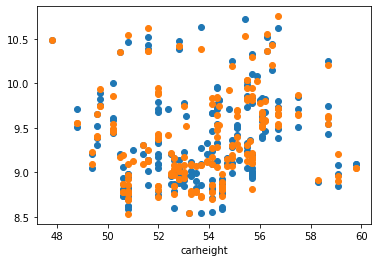

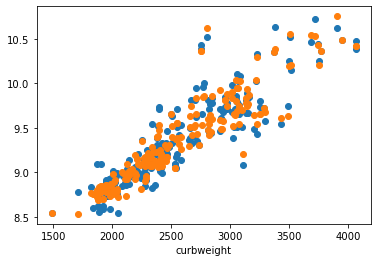

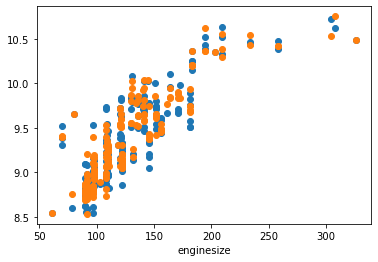

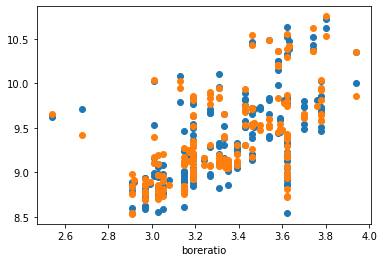

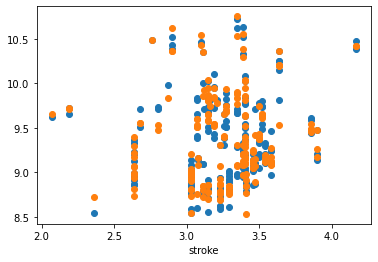

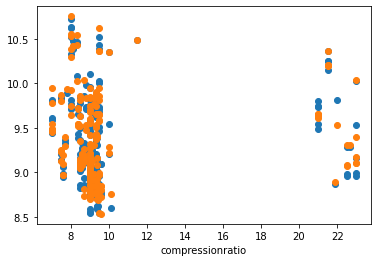

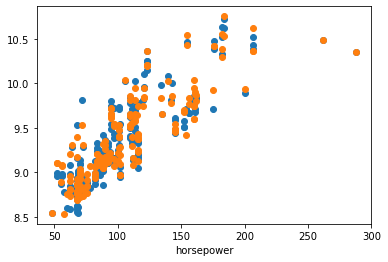

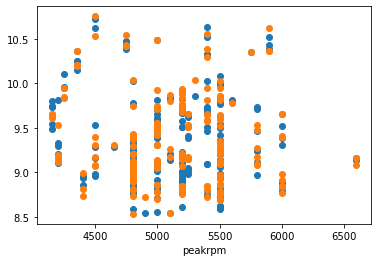

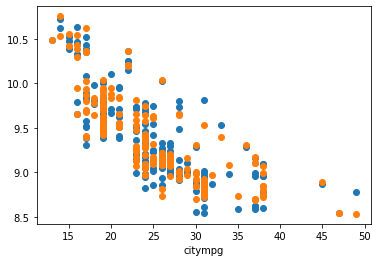

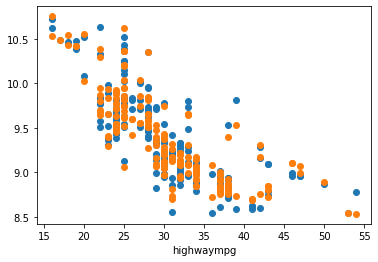

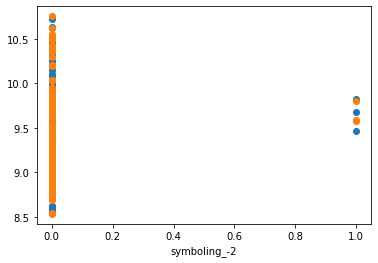

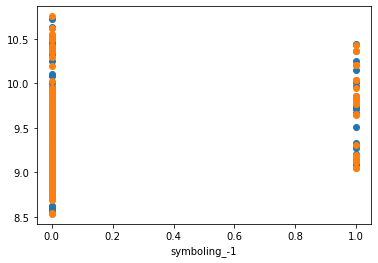

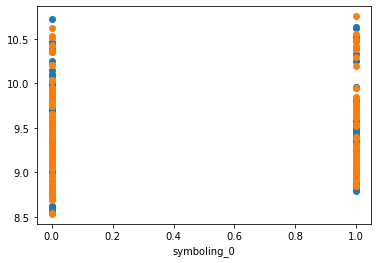

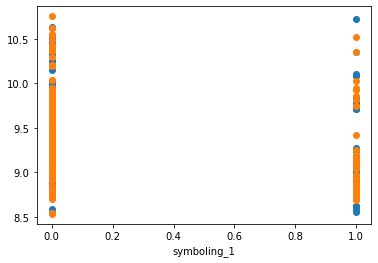

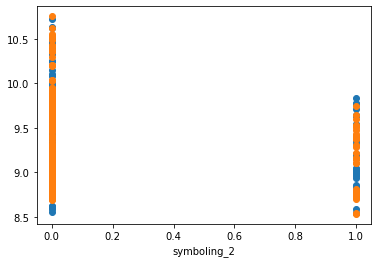

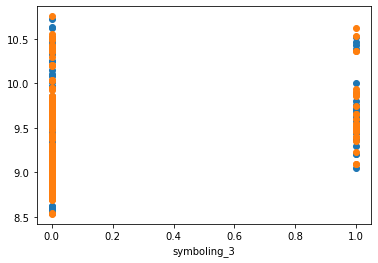

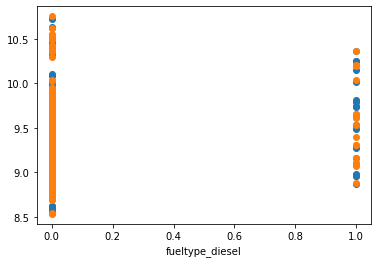

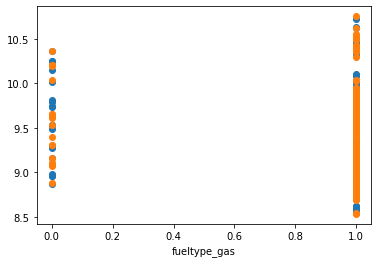

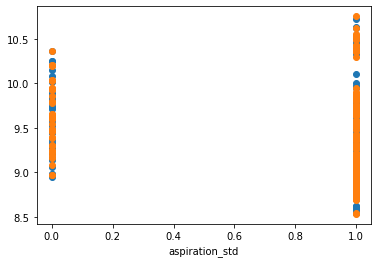

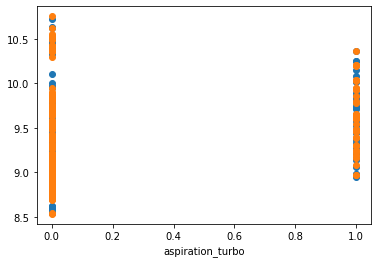

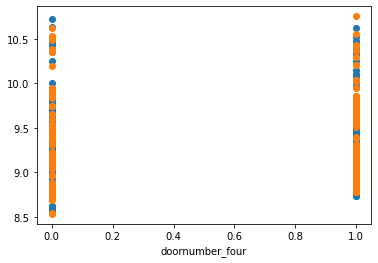

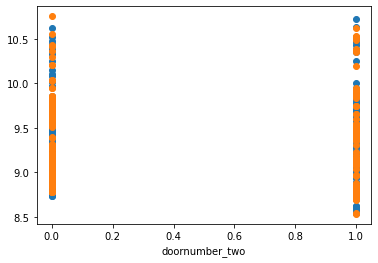

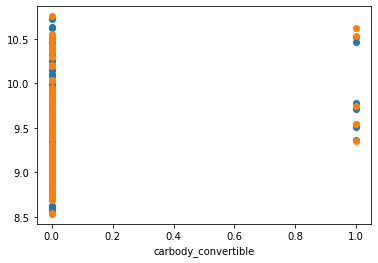

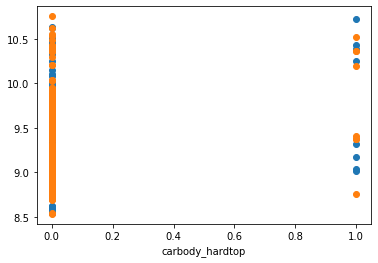

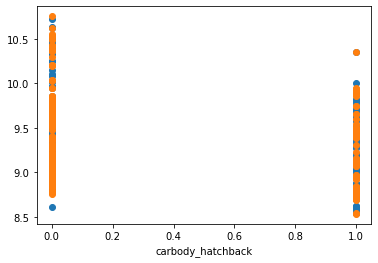

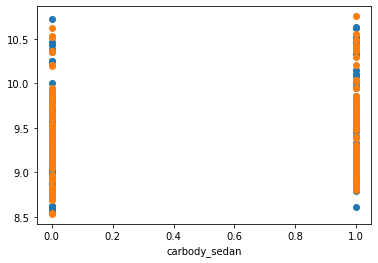

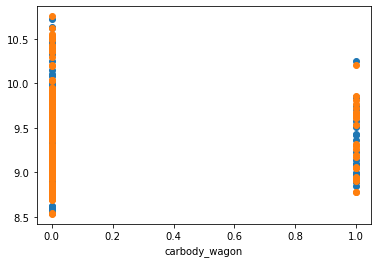

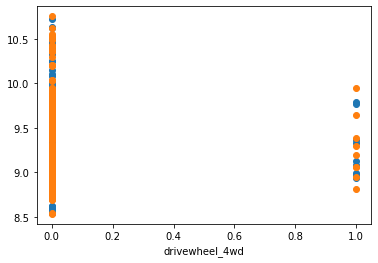

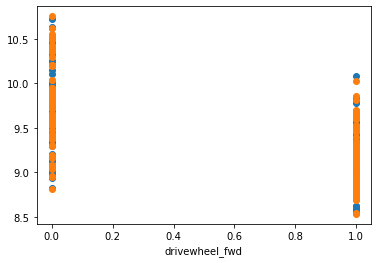

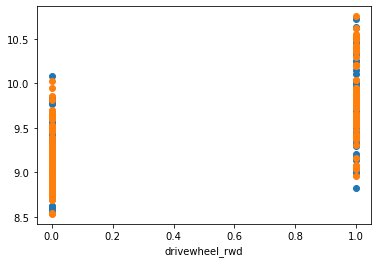

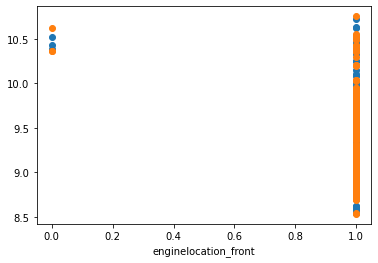

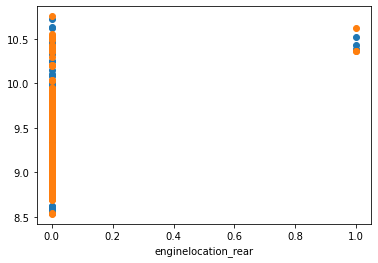

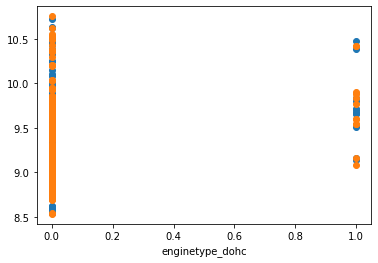

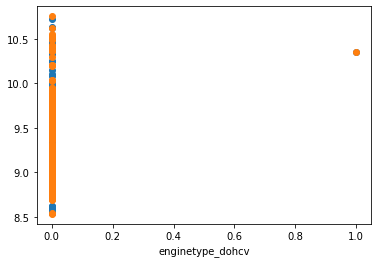

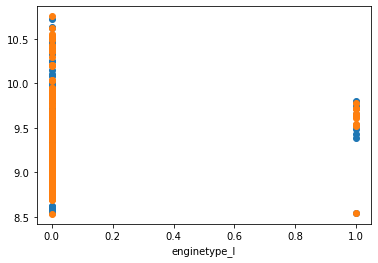

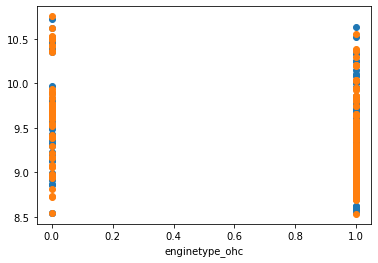

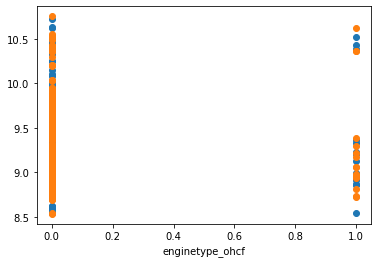

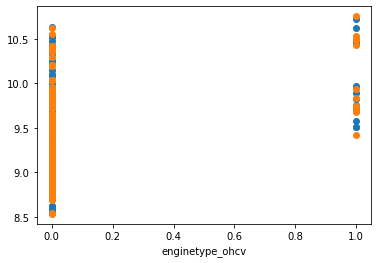

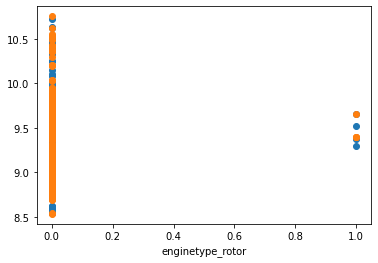

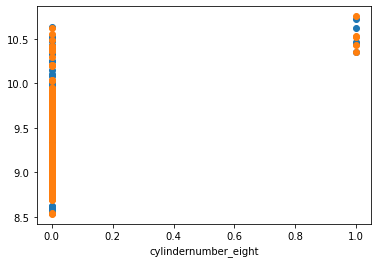

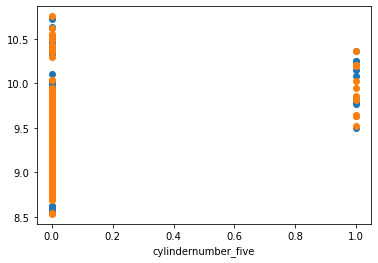

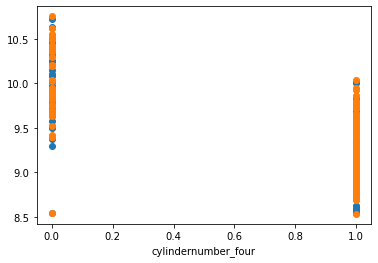

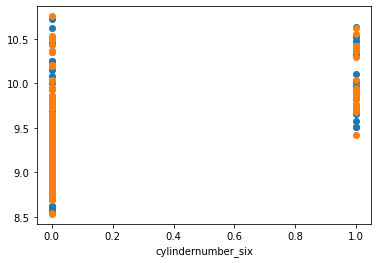

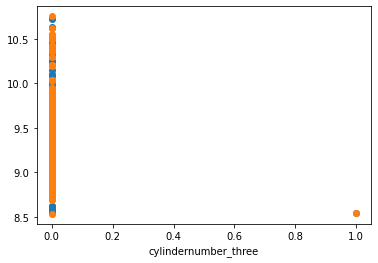

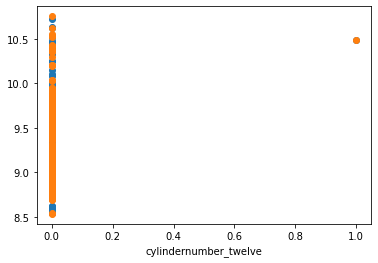

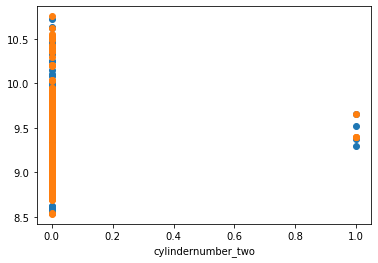

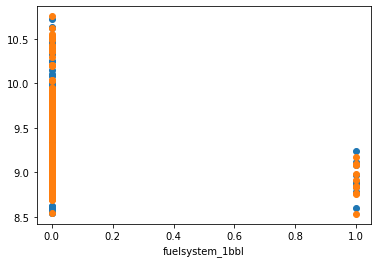

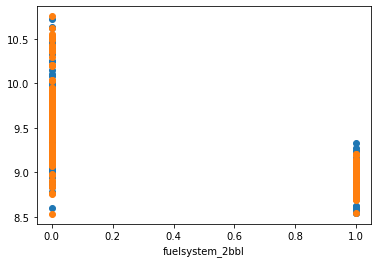

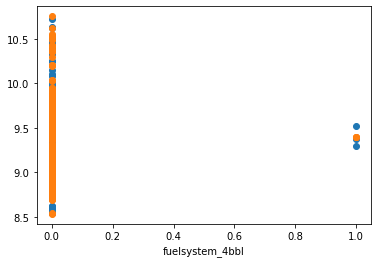

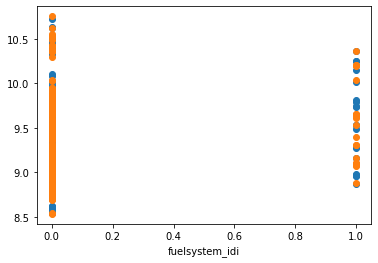

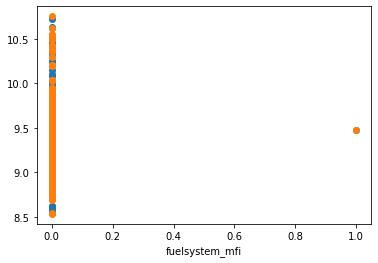

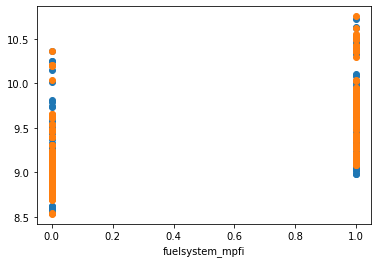

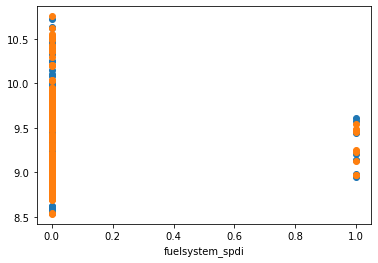

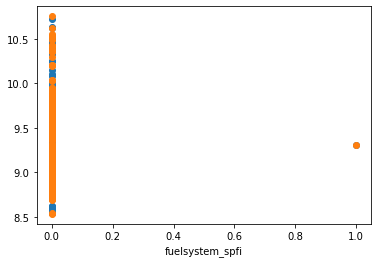

In [14]:
for var in x.columns.values:
    plt.scatter(x[var], logy)
    plt.scatter(x[var], y_pred)
    plt.xlabel(var)
    plt.show()